<a href="https://colab.research.google.com/github/tanvgen/Vlg-project/blob/main/low_light_enhancement_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, concatenate,Cropping2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
from keras.preprocessing.image import img_to_array, array_to_img

In [2]:
from google.colab import drive
from zipfile import ZipFile
drive.mount('/content/drive', force_remount=True)
archive_path = '/content/drive/My Drive/Train.zip'
with ZipFile(archive_path, 'r') as zip_ref:
    zip_ref.extractall('/content/Train')

Mounted at /content/drive


In [3]:
from tqdm import tqdm
noisy_data=[]

SIZE = 320
np.random.seed(42)
path1 = '/content/Train/Train/low/'
files=os.listdir(path1)
for i in tqdm(files):
    img=cv2.imread(path1+'/'+i,1)
    print(img.shape)
    img=cv2.resize(img,(200,320))
    noisy_data.append(img_to_array(img))

  4%|▍         | 19/485 [00:00<00:05, 93.04it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


  9%|▉         | 43/485 [00:00<00:04, 105.56it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 13%|█▎        | 65/485 [00:00<00:03, 106.62it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 18%|█▊        | 88/485 [00:00<00:03, 108.55it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 23%|██▎       | 112/485 [00:01<00:03, 112.11it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 26%|██▌       | 124/485 [00:01<00:03, 110.67it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 31%|███       | 149/485 [00:01<00:02, 114.49it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 36%|███▌      | 174/485 [00:01<00:02, 115.63it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 41%|████      | 199/485 [00:01<00:02, 116.26it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 46%|████▌     | 223/485 [00:02<00:02, 116.49it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 51%|█████     | 247/485 [00:02<00:02, 111.10it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 56%|█████▌    | 270/485 [00:02<00:01, 108.82it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 60%|██████    | 292/485 [00:02<00:01, 105.90it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 65%|██████▍   | 314/485 [00:02<00:01, 106.85it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 69%|██████▉   | 337/485 [00:03<00:01, 106.50it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 74%|███████▍  | 359/485 [00:03<00:01, 105.99it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 79%|███████▉  | 382/485 [00:03<00:00, 108.13it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 83%|████████▎ | 404/485 [00:03<00:00, 107.43it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 88%|████████▊ | 427/485 [00:03<00:00, 108.97it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 93%|█████████▎| 451/485 [00:04<00:00, 111.70it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 98%|█████████▊| 476/485 [00:04<00:00, 112.50it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


100%|██████████| 485/485 [00:04<00:00, 109.39it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


In [4]:
clean_data=[]
path2 = '/content/Train/Train/high/'
files=os.listdir(path2)
for i in tqdm(files):
    img=cv2.imread(path2+'/'+i,1)  #Change 0 to 1 for color images
    img=cv2.resize(img,(200,320))
    clean_data.append(img_to_array(img))


100%|██████████| 485/485 [00:05<00:00, 89.45it/s]


In [5]:
print(len(noisy_data))
print(len(clean_data))
noisy_train = np.reshape(noisy_data, (len(noisy_data), 200, 320, 3))
noisy_train = noisy_train.astype('float32') / 255.
noisy_train.shape

clean_train = np.reshape(clean_data, (len(clean_data), 200, 320, 3))
clean_train = clean_train.astype('float32') / 255.
clean_train.shape

485
485


(485, 200, 320, 3)

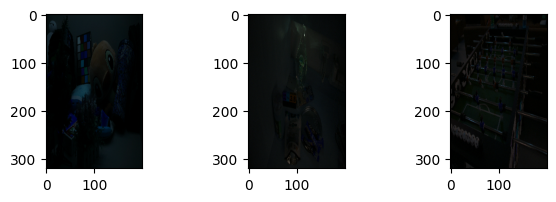

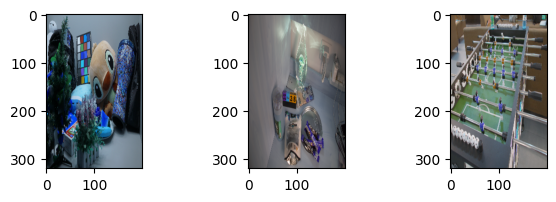

In [6]:
#Displaying images with noise
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(noisy_train[i].reshape(320, 200,3))
plt.show()

#Displaying clean images
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(clean_train[i].reshape(320, 200,3), cmap="binary")
plt.show()

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(200, 320, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))


model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 320, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 160, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 160, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 80, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 80, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 40, 8)         0

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(noisy_train, clean_train, test_size = 0.20, random_state = 0)


model.fit(x_train, y_train, epochs=100, batch_size=16, shuffle=True, verbose = 1, validation_split = 0.1)

model.save('denoising_autoencoder.model')

def psnr(image1, image2):
  mse = np.mean((image1 - image2) ** 2)
  if mse == 0:  # Avoid division by zero
    return float('inf')
  max_pixel = 1.0  # Assuming images have 8-bit pixel values (0-255)
  psnr = 10 * np.log10(max_pixel**2 / mse)
  return psnr

# Evaluate model on test data
denoised_images = model.predict(x_test)

# Calculate PSNR for each test image (assuming clean_train is the ground truth)
psnr_values = []
for i in range(len(x_test)):
  original_image = clean_train[i]
  denoised_image = denoised_images[i]
  psnr_value = psnr(original_image, denoised_image)
  psnr_values.append(psnr_value)

# Print average PSNR
average_psnr = np.mean(psnr_values)
print("Average PSNR on Test Set:", average_psnr, "dB")

Epoch 1/100
22/22 [==============================] - 61s 3s/step - loss: 0.0447 - accuracy: 0.0031 - val_loss: 0.0437 - val_accuracy: 0.0022
Epoch 2/100
22/22 [==============================] - 57s 3s/step - loss: 0.0439 - accuracy: 0.0032 - val_loss: 0.0430 - val_accuracy: 0.0028
Epoch 3/100
22/22 [==============================] - 59s 3s/step - loss: 0.0436 - accuracy: 0.0030 - val_loss: 0.0424 - val_accuracy: 0.0033
Epoch 4/100
22/22 [==============================] - 63s 3s/step - loss: 0.0438 - accuracy: 0.0035 - val_loss: 0.0428 - val_accuracy: 0.0021
Epoch 5/100
22/22 [==============================] - 58s 3s/step - loss: 0.0433 - accuracy: 0.0040 - val_loss: 0.0439 - val_accuracy: 0.0018
Epoch 6/100
22/22 [==============================] - 58s 3s/step - loss: 0.0437 - accuracy: 0.0033 - val_loss: 0.0421 - val_accuracy: 0.0038
Epoch 7/100
22/22 [==============================] - 62s 3s/step - loss: 0.0429 - accuracy: 0.0040 - val_loss: 0.0422 - val_accuracy: 0.0025
Epoch 8/100
2

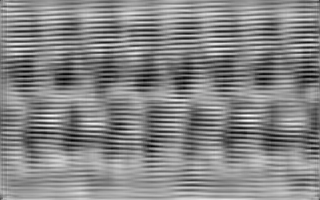

In [15]:
array_to_img(denoised_images[4]*255)

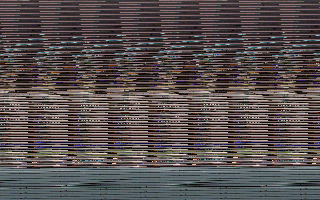

In [16]:
array_to_img(x_test[4]*255)

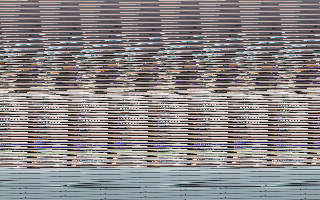

In [17]:
array_to_img(y_test[4]*255)


In [ ]:
predicted_folder = "/content/Train/Train/predicted/"
os.makedirs(predicted_folder, exist_ok=True)

for i in range(len(x_test)):
   image_name = f"denoised_images{i}.png"  # Example filename format
   print(image_name)

   image_path = os.path.join(predicted_folder, image_name)
   print(f"Saving image to: {image_path}")